In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt

from nalger_helper_functions import plot_ellipse, \
    plot_rectangle, circle_mesh, ellipsoid_bounding_box, \
    make_regular_grid

from nalger_helper_functions import FenicsFunctionToRegularGridInterpolator

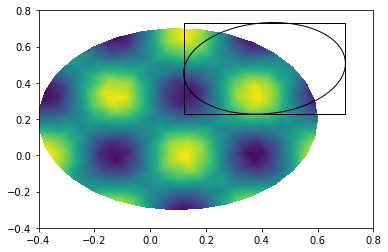

In [2]:
mesh = circle_mesh(np.array([0.1,0.2]), 0.5, 0.1)

mu = np.array([0.41, 0.48])
Sigma = np.array([[2.1, 0.2],
                  [0.2, 1.6]])*0.01
tau = 2.0

grid_min, grid_max = ellipsoid_bounding_box(mu, Sigma, tau)
grid_shape = np.array([20,25])

V = dl.FunctionSpace(mesh, 'CG', 2)
u_expr = dl.Expression('sin(4*pi*x[0])*cos(3*pi*x[1])', domain=mesh, degree=5)
u = dl.interpolate(u_expr, V)

fig = plt.figure()
ax = fig.add_subplot(111)
dl.plot(u)
plot_ellipse(mu, Sigma, tau)
plot_rectangle(grid_min, grid_max)
plt.xlim(-0.4, 0.8)
plt.ylim(-0.4, 0.8)
plt.show()

<ipython-input-3-d7895d9d2be5>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,U1)
<ipython-input-3-d7895d9d2be5>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,U2)
<ipython-input-3-d7895d9d2be5>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or 

Text(0.5, 1.0, 'ellipse truncation with extrapolation')

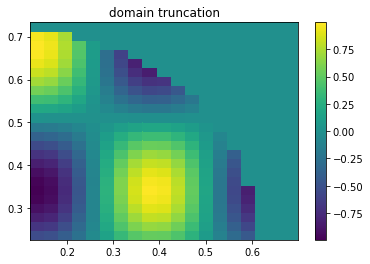

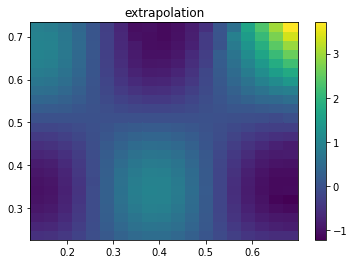

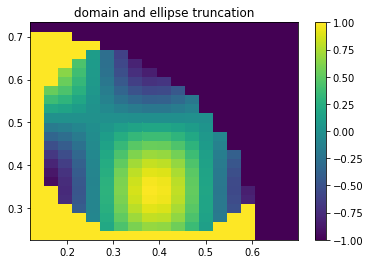

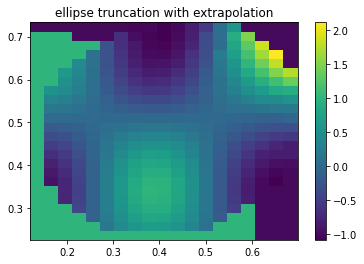

In [3]:
V_grid_interpolator = FenicsFunctionToRegularGridInterpolator(V, grid_min, grid_max, grid_shape)

_, (X, Y) = make_regular_grid(grid_min, grid_max, grid_shape)

# U1 = V_grid_interpolator.interpolate(u, outside_domain_default_value=-1.0)
U1 = V_grid_interpolator.interpolate(u)

plt.figure()
plt.pcolor(X,Y,U1)
plt.colorbar()
plt.title('domain truncation')

U2 = V_grid_interpolator.interpolate(u, use_extrapolation=True)

plt.figure()
plt.pcolor(X,Y,U2)
plt.colorbar()
plt.title('extrapolation')

U3 = V_grid_interpolator.interpolate(u, mu=mu, Sigma=Sigma, tau=tau,
                                                      outside_domain_default_value=-1.0, 
                                                      inside_domain_default_value=1.0)

plt.figure()
plt.pcolor(X,Y,U3)
plt.colorbar()
plt.title('domain and ellipse truncation')

U4 = V_grid_interpolator.interpolate(u, mu=mu, Sigma=Sigma, tau=tau,
                                                      outside_domain_default_value=-1.0, 
                                                      inside_domain_default_value=1.0,
                                                      use_extrapolation=True)

plt.figure()
plt.pcolor(X,Y,U4)
plt.colorbar()
plt.title('ellipse truncation with extrapolation')